In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt


In [52]:
df = pd.read_csv('/Users/boydoyier/Documents/git_projects/activities.csv') 
df.columns=df.columns.str.lower() 

In [53]:
all_columns = df.columns
print(all_columns)


Index(['activity id', 'activity date', 'activity name', 'activity type',
       'activity description', 'elapsed time', 'distance', 'max heart rate',
       'relative effort', 'commute', 'activity private note', 'activity gear',
       'filename', 'athlete weight', 'bike weight', 'elapsed time.1',
       'moving time', 'distance.1', 'max speed', 'average speed',
       'elevation gain', 'elevation loss', 'elevation low', 'elevation high',
       'max grade', 'average grade', 'average positive grade',
       'average negative grade', 'max cadence', 'average cadence',
       'max heart rate.1', 'average heart rate', 'max watts', 'average watts',
       'calories', 'max temperature', 'average temperature',
       'relative effort.1', 'total work', 'number of runs', 'uphill time',
       'downhill time', 'other time', 'perceived exertion', 'type',
       'start time', 'weighted average power', 'power count',
       'prefer perceived exertion', 'perceived relative effort', 'commute.1',
    

In [54]:
cols = ['activity date', 'activity type', 'elapsed time', 'distance', 'moving time', 
         'max heart rate', 'elevation gain', 'max speed', 'average speed', 'calories',
         'average temperature', 'humidity'
       ]
df = df[cols] 
df

,activity date,activity type,elapsed time,distance,moving time,max heart rate,elevation gain,max speed,average speed,calories,average temperature,humidity
0,"Jul 27, 2021, 6:37:20 PM",Run,3195,10.15,3163.0,NaN,85.800003,5.500000,3.208852,1037.672607,24.0,NaN
1,"Jul 31, 2021, 10:42:45 AM",Run,1997,7.01,1997.0,NaN,17.400988,6.900000,3.510215,706.300049,NaN,0.69
2,"Aug 6, 2021, 10:01:35 AM",Run,4113,5.01,3568.0,NaN,88.786102,6.900000,1.404064,537.903564,NaN,0.62
3,"Aug 8, 2021, 7:50:34 AM",Run,2436,8.02,2436.0,NaN,89.433914,10.600000,3.292365,825.126709,NaN,0.71
4,"Aug 9, 2021, 6:06:42 PM",Run,3370,10.13,3279.0,NaN,142.481674,12.600000,3.089844,1063.757202,NaN,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
327,"Sep 10, 2024, 2:04:26 PM",Run,1345,4.23,974.0,187.0,40.115639,6.340000,4.343943,237.000000,NaN,0.62
328,"Sep 21, 2024, 11:35:16 AM",Run,5801,21.21,5764.0,178.0,167.088028,8.259961,3.680292,1401.000000,NaN,0.82
329,"Sep 28, 2024, 8:29:24 AM",Run,5954,18.64,5805.0,178.0,214.887054,5.759961,3.210870,1457.000000,NaN,0.78
330,"Oct 1, 2024, 2:04:05 PM",Run,1323,4.16,945.0,177.0,38.025867,8.215000,4.402116,227.000000,NaN,0.68


In [59]:
df['activity_date'] = pd.to_datetime(df['activity date'])
df['start_time'] = df['activity_date'].dt.time
df['start_date_local'] = df['activity_date'].dt.date
df['month'] = df['activity_date'].dt.month_name()
df['year'] = df['activity_date'].dt.year
#df['year'] = (df['year']).astype(np.object) #change year from numeric to object
#df['dayofyear'] = df['activity_date'].dt.dayofyear
df['day'] = df['activity_date'].dt.day

#df['dayofyear'] = pd.to_numeric(df['dayofyear'])
df['distance'] = pd.to_numeric(df['distance'], errors='coerce').fillna(0).astype('int64')

#df['distance'] = pd.to_numeric(df['distance'], errors = 'coerce')
#df.head(3)
## day and year need to be changed from integers to objects

/var/folders/20/v81skv3s7vdb3xb49dlqvzp40000gn/T/ipykernel_1929/4268498353.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['activity_date'] = pd.to_datetime(df['activity date'])


In [70]:
df['elapsed minutes'] = df['elapsed time'] /60 
df['km per hour'] = df['distance'] / (df['elapsed minutes'] / 60)
df['avg pace'] = df['elapsed minutes'] / df['distance']
#df.head()

In [75]:
df = df[df['distance'] <= 70]
df = df[df['elapsed minutes'] >= 10]
#df = df[df['km per hour'] > 5]

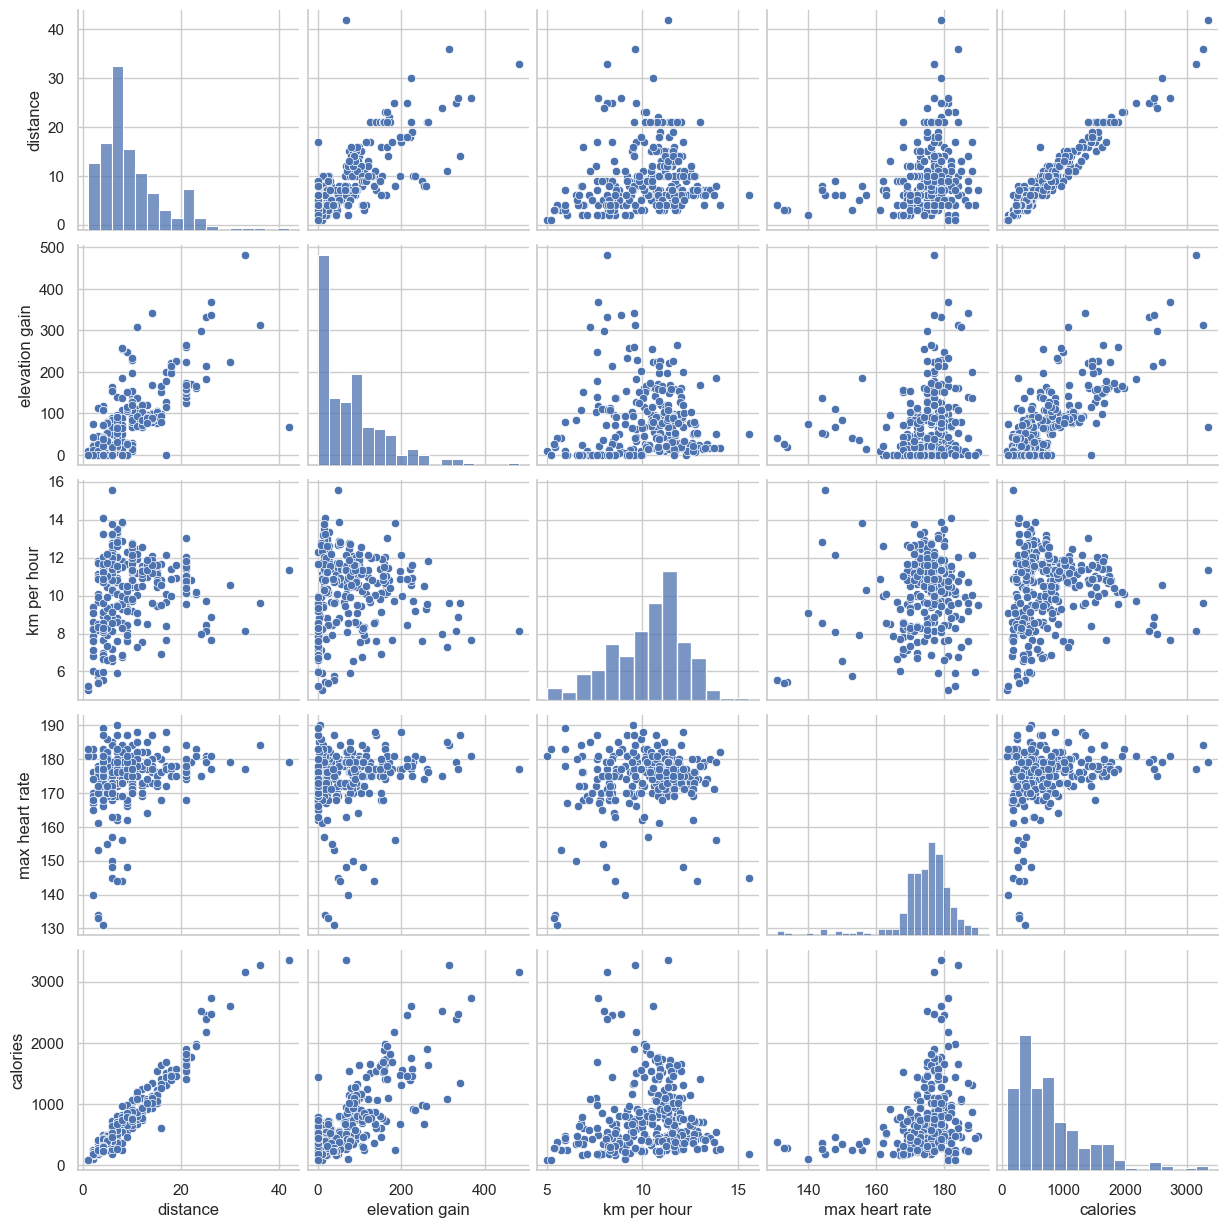

In [76]:
pp_df = df[['distance', 'elevation gain', 'km per hour', 'max heart rate', 'calories']]
sns.pairplot(pp_df);

In [77]:
df.describe().round(0)

,elapsed time,distance,moving time,max heart rate,elevation gain,max speed,average speed,calories,average temperature,humidity,activity_date,year,day,elapsed minutes,km per hour,avg pace
count,291.0,291.0,291.0,270.0,291.0,291.0,291.0,291.0,3.0,261.0,291,291.0,291.0,291.0,291.0,291.0
mean,3428.0,10.0,3253.0,174.0,80.0,7.0,3.0,785.0,23.0,1.0,2023-01-11 13:53:49.941580544,2023.0,17.0,57.0,10.0,6.0
min,687.0,1.0,381.0,131.0,0.0,3.0,2.0,80.0,21.0,0.0,2021-07-27 18:37:20,2021.0,1.0,11.0,5.0,4.0
25%,1870.0,5.0,1752.0,172.0,17.0,6.0,3.0,389.0,22.0,1.0,2022-03-11 23:37:24,2022.0,9.0,31.0,9.0,5.0
50%,2865.0,8.0,2652.0,176.0,68.0,6.0,3.0,642.0,23.0,1.0,2022-10-30 10:25:23,2022.0,17.0,48.0,11.0,6.0
75%,4245.0,13.0,4074.0,179.0,111.0,8.0,3.0,1028.0,24.0,1.0,2024-01-19 00:44:53,2024.0,24.0,71.0,12.0,7.0
max,14595.0,42.0,14220.0,190.0,482.0,15.0,5.0,3350.0,24.0,1.0,2024-10-17 14:26:15,2024.0,31.0,243.0,16.0,12.0
std,2364.0,7.0,2295.0,9.0,79.0,2.0,1.0,574.0,2.0,0.0,NaN,1.0,9.0,39.0,2.0,1.0


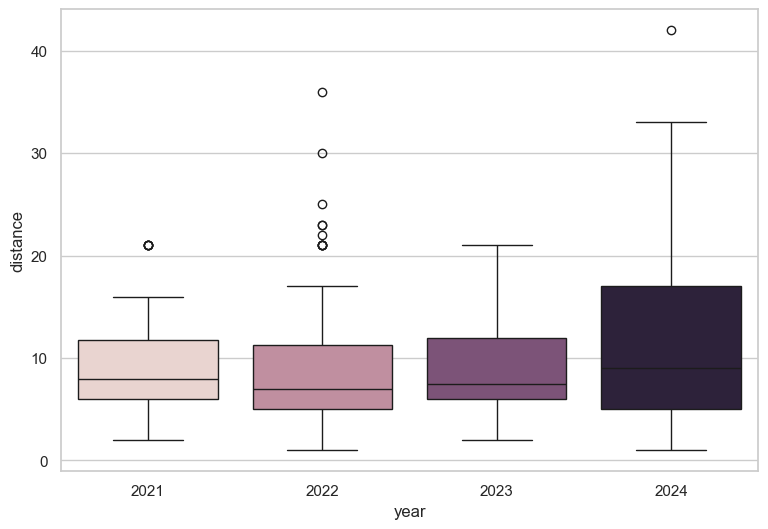

In [78]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", font_scale=1)
sns.boxplot(x="year", y="distance", hue="year", data=df)
ax.legend_.remove()
plt.gcf().set_size_inches(9, 6)

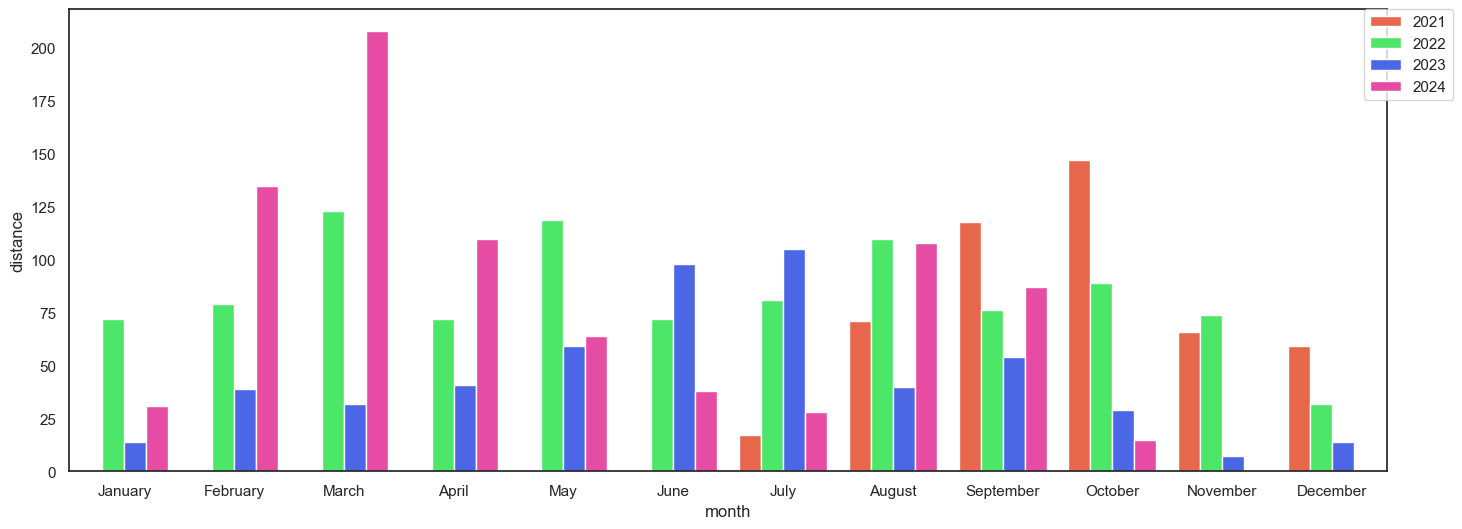

In [83]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33A8"]

sns.set_style('white')
sns.barplot(x='month', y='distance', data=df, hue='year', errorbar=None, estimator=np.sum, palette=custom_palette,
           order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.gcf().set_size_inches(17, 6)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0)

plt.show()